# Making maps with Python {#sec-map-making}

## 介绍

- Geopandas explore 已在前面的章节中使用过。
- 何时专注于可视化？ 在地理数据处理工作流程结束时。

<!-- Input datasets: https://github.com/geocompx/spDatapy -->
<!-- Decision of whether to use static or interactive. -->
<!-- Flow diagram? -->

 quarto导出ipynb技巧：由于quarto是先要生成ipynb再转换的，所以专门让其报错一次就可以得到中间过程的ipynb


In [1]:
#| echo: false
#| label: getdata
from pathlib import Path
data_path = Path("data")
if data_path.is_dir():
  pass
  # print("path exists") # directory exists
else:
  print("Attempting to get and unzip the data")
  import requests, zipfile, io
  r = requests.get("https://github.com/geocompx/geocompy/releases/download/0.1/data.zip")
  z = zipfile.ZipFile(io.BytesIO(r.content))
  z.extractall(".")

In [2]:
# 出现错误CRSError: Invalid projection: epsg:4326: 的解决方案
# 因为装了多个版本的pyproj
# 在anaconda的目录下搜一下其他的proj.db文件的路径
# 复制路径在所装的环境文件夹下的Library文件夹下的那个路径，使用pyproj.datadir.set_data_dir()来更新目录
import pyproj
# pyproj.datadir.get_data_dir()
path = 'D:\work\miniconda3\Library\share\proj'
pyproj.datadir.set_data_dir(path)

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio
import rasterio.plot
nz = gpd.read_file("data/nz.gpkg")

## 静态地图

- 专注于matlibplot
- 第一个示例：带有填充和边框的 NZ
- 可怕的 matplotlib 代码在这里......

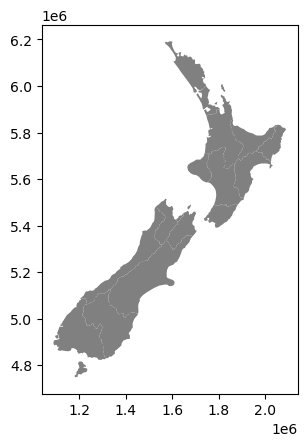

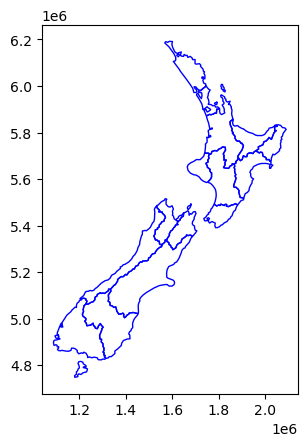

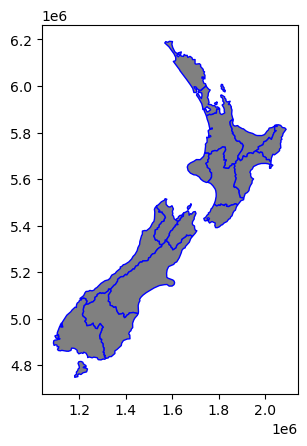

In [4]:
#| layout-ncol: 3
nz.plot(color="grey");
nz.plot(color="none", edgecolor="blue");
nz.plot(color="grey", edgecolor="blue");

<!-- # Add fill layer to nz shape
tm_shape(nz) +
  tm_fill()
# Add border layer to nz shape
tm_shape(nz) +
  tm_borders()
# Add fill and border layers to nz shape
tm_shape(nz) +
  tm_fill() +
  tm_borders()  -->

如第 2 章所述，您可以按如下方式绘制栅格数据集：

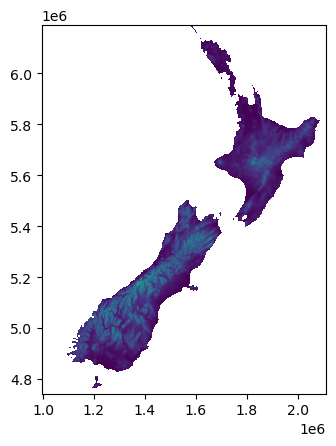

In [5]:
nz_elev = rasterio.open('data/nz_elev.tif')
rasterio.plot.show(nz_elev);

<!--
In R:
nz_elev = stars::read_stars("data/nz_elev.tif")
sf::st_crs(nz_elev)
nz = spData::nz
waldo::compare(sf::st_crs(nz), sf::st_crs(nz_elev))
library(sf)
plot(nz)
nz_elev_transformed = sf::st_transform(nz_elev, sf::st_crs(nz))
stars::write_stars(nz_elev_transformed, "data/nz_elev.tif")
nz_transformed = sf::st_transform(nz, sf::st_crs(nz_elev))
sf::st_write(nz_transformed, "nz_transformed.gpkg")
-->


您可以将上面显示的栅格和矢量绘图方法组合到具有多个图层的单个可视化中，如下所示：

<!-- 
Source:
https://gis.stackexchange.com/questions/294072/how-can-i-superimpose-a-geopandas-dataframe-on-a-raster-plot
-->


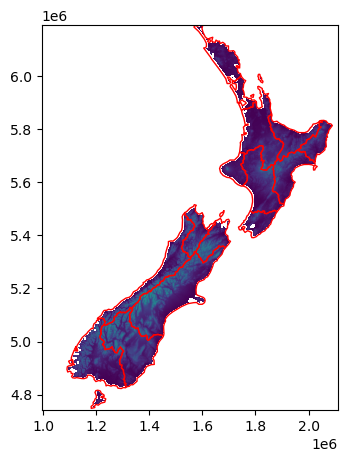

In [6]:
fig, ax = plt.subplots(figsize=(5, 5))
rasterio.plot.show(nz_elev, ax=ax)
nz.to_crs(nz_elev.crs).plot(ax=ax, facecolor='none', edgecolor='r');